# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/illya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("../../resources/api_keys.env")
newsapi_key = os.getenv("NEWSAPI_API_KEY")
print(f"NewsAPI API Key Type : {type(newsapi_key)}")

NewsAPI API Key Type : <class 'str'>


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=newsapi_key)

In [4]:
# Fetch the Bitcoin news articles 
article_n = 20 #100 maximum allowed by free NewsAPI account
pages = int(article_n / 20)
btc_news = []

# Get 5 pages of articles (100 articles)
for i in list(range(1,pages+1)):
    articles = newsapi.get_everything(q='bitcoin', language='en', page=i)['articles']
    btc_news.append(articles)

btc_corpus = [y for x in btc_news for y in x]

print(f"Total articles about Bitcoin: {len(btc_corpus)}")

Total articles about Bitcoin: 20


In [5]:
# Fetch the Bitcoin news articles 
article_n = 20 #100 maximum allowed by free NewsAPI account
pages = int(article_n / 20)
eth_news = []

# Get 5 pages of articles (100 articles)
for i in list(range(1,pages+1)):
    articles = newsapi.get_everything(q='ethereum', language='en', page=i)['articles']
    eth_news.append(articles)

eth_corpus = [y for x in eth_news for y in x]

print(f"Total articles about Ethereum: {len(eth_corpus)}")

Total articles about Ethereum: 20


In [6]:
# Initialize the VADER sentiment analyzer
btc_analyzer = SentimentIntensityAnalyzer()

# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_corpus:
    try:
        text = article['content']
        date = article['publishedAt']
        
        sentiment = btc_analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiment.append({
            'date' : date,
            'text' : text,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
        
    except AttributeError:
        print('error')
    
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2018-06-08T17:30:00Z,"I’ve lost over $300,000 worth of bitcoin so fa...",0.9948,0.187,0.057,0.755
1,2020-07-17T19:30:40Z,Just hackers burning up 0day like it’s a fire ...,-0.9988,0.092,0.153,0.755
2,2020-07-31T18:33:02Z,"Authorities in Tampa, Florida have arrested a ...",-0.9764,0.000,0.222,0.778
3,2019-02-15T14:53:40Z,"If youre a Coinbase user, you may have seen so...",0.9714,0.097,0.013,0.889
4,2020-02-15T14:00:00Z,Just when you thought the catastrophic Equifax...,0.9585,0.120,0.079,0.801


In [7]:
len(btc_df.index)

20

In [8]:
# Initiate VADER sentiment analyzer
eth_analyzer = SentimentIntensityAnalyzer()

# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_corpus:
    try:
        text = article['content']
        date = article['publishedAt']
        
        sentiment = eth_analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        eth_sentiment.append({
            'date' : date,
            'text' : text,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2017-12-04T18:00:26Z,A scant three months after its launch the $50 ...,0.9844,0.088,0.024,0.888
1,2018-06-12T01:57:49Z,Coinbase may be one of the most-lauded crypto ...,0.9872,0.085,0.017,0.899
2,2018-07-03T10:45:14Z,Our TC Sessions: Blockchain event takes place ...,0.9742,0.062,0.000,0.938
3,2019-01-08T06:32:54Z,Coinbase is preparing to list a lot of new coi...,0.8519,0.099,0.078,0.823
4,2017-11-11T12:00:00Z,"On Monday, a small configuration mistake at an...",-0.9579,0.058,0.080,0.862


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe().round(3)

,compound,positive,negative,neutral
count,20.000,20.000,20.000,20.000
mean,0.456,0.108,0.066,0.826
std,0.860,0.049,0.054,0.057
min,-0.999,0.000,0.012,0.755
25%,0.064,0.085,0.033,0.785
50%,0.970,0.103,0.049,0.811
75%,0.994,0.127,0.084,0.859
max,0.998,0.215,0.222,0.957


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe().round(3)

,compound,positive,negative,neutral
count,20.000,20.000,20.000,20.000
mean,0.561,0.092,0.042,0.867
std,0.704,0.032,0.033,0.043
min,-0.958,0.050,0.000,0.780
25%,0.508,0.070,0.018,0.838
50%,0.947,0.084,0.030,0.868
75%,0.987,0.109,0.062,0.894
max,0.998,0.180,0.107,0.950


### Questions:

Q: Which coin had the highest mean positive score?

A: **BTC has the highest mean + score : 0.09**

Q: Which coin had the highest compound score?

A: **BTC has the highest compound score : 0.25**

Q. Which coin had the highest positive score?

A: **BTC has the highest positive score : 0.28**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /Users/illya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/illya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/illya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
custom_sw = ['char','tec','inc','say','via','bos']

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lem_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens_sw = [word for word in lem_lower if word not in sw]
    
    # Remove custom stop words
    tokens_csw = [word for word in tokens_sw if word not in custom_sw]
    
    # Remove all words less than 3 chars long
    tokens = [word for word in tokens_csw if len(word) > 2]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]

# Clean up articles returning blank str for text
btc_df.replace("", float("NaN"), inplace=True)
btc_df.dropna(subset=["text"], inplace=True)
print(f"Total articles about Bitcoin remaining: {len(btc_df)}")

Total articles about Bitcoin remaining: 20


In [15]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2018-06-08T17:30:00Z,"I’ve lost over $300,000 worth of bitcoin so fa...",0.9948,0.187,0.057,0.755,"[ive, lost, worth, bitcoin, far, nows, bit, su..."
1,2020-07-17T19:30:40Z,Just hackers burning up 0day like it’s a fire ...,-0.9988,0.092,0.153,0.755,"[hacker, burning, day, like, fire, saleimagine..."
2,2020-07-31T18:33:02Z,"Authorities in Tampa, Florida have arrested a ...",-0.9764,0.000,0.222,0.778,"[authorities, tampa, florida, arrested, yearol..."
3,2019-02-15T14:53:40Z,"If youre a Coinbase user, you may have seen so...",0.9714,0.097,0.013,0.889,"[youre, coinbase, user, may, seen, new, token,..."
4,2020-02-15T14:00:00Z,Just when you thought the catastrophic Equifax...,0.9585,0.120,0.079,0.801,"[thought, catastrophic, equifax, breach, entir..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]

# Clean up articles returning blank str for text
eth_df.replace("", float("NaN"), inplace=True)
eth_df.dropna(subset=["text"], inplace=True)
print(f"Total articles about Ethereum remaining: {len(eth_df)}")

Total articles about Ethereum remaining: 20


In [17]:
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2017-12-04T18:00:26Z,A scant three months after its launch the $50 ...,0.9844,0.088,0.024,0.888,"[scant, three, month, launch, million, consens..."
1,2018-06-12T01:57:49Z,Coinbase may be one of the most-lauded crypto ...,0.9872,0.085,0.017,0.899,"[coinbase, may, one, mostlauded, crypto, excha..."
2,2018-07-03T10:45:14Z,Our TC Sessions: Blockchain event takes place ...,0.9742,0.062,0.000,0.938,"[sessions, blockchain, event, take, place, zug..."
3,2019-01-08T06:32:54Z,Coinbase is preparing to list a lot of new coi...,0.8519,0.099,0.078,0.823,"[coinbase, preparing, list, lot, new, coin, ye..."
4,2017-11-11T12:00:00Z,"On Monday, a small configuration mistake at an...",-0.9579,0.058,0.080,0.862,"[monday, small, configuration, mistake, intern..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_li = [y for x in btc_df['tokens'] for y in x]

In [20]:
btc_grams = ngrams(btc_li, n=2)

In [21]:
# Generate the Ethereum N-grams where N=2
eth_li = [y for x in eth_df['tokens'] for y in x]

In [22]:
eth_grams = ngrams(eth_li, n=2)

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N : int=10):
    """Returns the top N tokens from the frequency count"""
    
    top = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(top.items()), columns=['tokens', 'count'])

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_grams,10)

,tokens,count
0,"(bitcoin, cash)",7
1,"(year, ago)",6
2,"(white, paper)",6
3,"(bitcoin, flip)",5
4,"(one, count)",5
5,"(credit, card)",5
6,"(make, sure)",5
7,"(email, address)",5
8,"(buy, sell)",5
9,"(worth, bitcoin)",4


In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_grams,10)

,tokens,count
0,"(ethereum, foundation)",19
1,"(ethereum, classic)",15
2,"(blockchain, event)",9
3,"(bitcoin, cash)",8
4,"(ethereum, meetup)",8
5,"(author, owns)",6
6,"(owns, small)",6
7,"(sessions, blockchain)",6
8,"(vitalik, buterin)",6
9,"(version, ethereum)",5


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

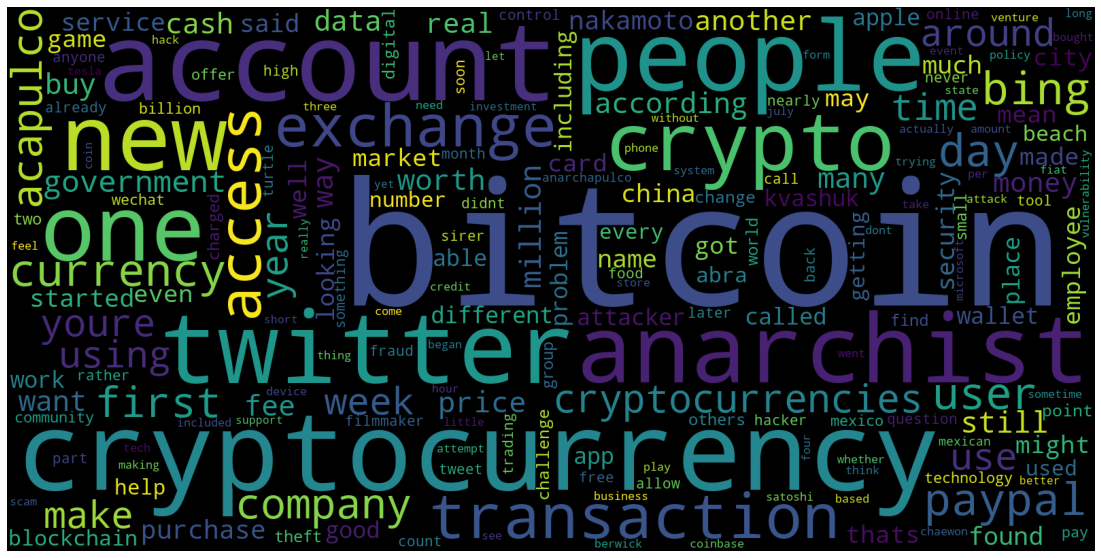

In [27]:
# Generate the Bitcoin word cloud
btc_li_bigstring = ' '.join(btc_li)
btc_wc = WordCloud(width=1600, height=800).generate(btc_li_bigstring)
plt.axis('off')
plt.imshow(btc_wc)
plt.savefig('img/btc_wc.png')

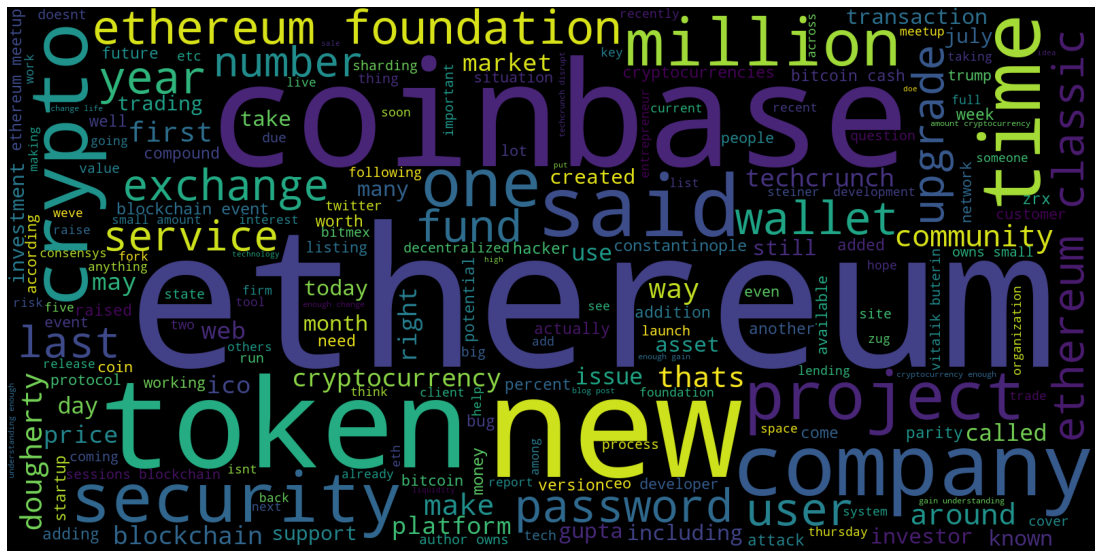

In [41]:
# Generate the Ethereum word cloud
eth_li_bigstring = ' '.join(eth_li)
eth_wc = WordCloud(width=1600, height=800).generate(eth_li_bigstring)
plt.axis('off')
plt.imshow(eth_wc)
plt.savefig('img/eth_wc.png')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
def replace_multiple(string, rep_list):
    for term in rep_list:
        string = string.replace(term, ' ')
    return string

rep_list = ['\r','\n','\xa0','[', ']','+','chars','-','\\']

In [33]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join([text for text in btc_df['text']])
btc_text = replace_multiple(btc_text,rep_list)

In [34]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!

In [35]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [36]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['300,000', 'Bitcoin Flip', '400', 'Mt. Gox', '210', '172', 'Bitcoin Flip', 'Bitcoin Flip', 'Android', 'Latvian', 'Trading Game', '24', 'Bitcoin, Ethereum, Ripple', 'Monero', 'Dogecoin', 'Bitcoin Flip', '5,000', 'Louise Mccauley', '0day', 'Twitter', 'US', '0day', '0day', 'July 16, 2020', 'five hours', 'Twitter', 'the National Weather Service', 'Andrew Roth', 'July 15, 2020', 'July 16, 2020', 'Jeff Bezos', 'Bill Gates', 'Elon Musk', 'Bill Gates', 'Barack Obama', 'Apple', 'Kanye West', 'Joe Biden', 'Uber', 'Mike Bloomberg', 'Floyd Mayweather', 'Wiz Khalifa', 'Thursday', 'evening', '130', 'approximately 130', 'Tweets', 'July 17, 2020', 'Kanye', 'Elon Musk', 'John McAfee', 'yesterday', 'around $118,000', '114', '118,000', 'Glassdoor', 'Twitter', '131,403', 'San Francisco', 'one', 'two', 'Reuters', 'two', 'Motherboard', 'Twitter', 'Twitter', 'Twitter', 'Twitter', 'years', 'Twitter', 'Twitter', 'Twitter’s', 'July 2018', 'Twitter’s', 'Twitter', 'Trends', 'Motherboard', 'Twitter', 'A Twitter s

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join([text for text in eth_df['text']])
eth_text = replace_multiple(eth_text,rep_list)

In [38]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!

In [39]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['three months', '$50 million', 'Consensys Ventures', 'Ethereum', 'Joe Lubin’s', 'Consensys Systems', 'first', 'four', 'Ethereum', 'Ethereum Ventures', 'Kavita Gupta', 'Gupta’s', 'first', 'Gupta', 'BlockFi', 'Zac Prince', 'Cognical', 'Kavita Gupta', 'Consensys Ventures', 'Microsoft Bing Ventures', 'Rahul Sood', 'Unikrn', 'MarK Cuban', '$25 million', 'September', 'Unikrn', 'these days', 'Gupta', 'over $100 million', 'a few months ago', '$20 million', '$10 million', '$5 million', 'Gupta', 'FOMO', 'Gupta', 'Gupta', 'Unikrn', 'Pryze', 'BlockFi', 'Consensys Ventures', 'Consensys', 'Gupta', 'Consensys', 'six month', 'Gupta', 'every day', 'Six months', 'five years', 'Ethereum', 'just four', 'Coinbase', 'Ethereum Classic', 'ETC', 'Ethereum', 'the coming months', 'Ethereum Classic', 'July 2016', 'DAO', 'the Ethereum Foundation', 'Ethereum', 'Ethereum — Ethereum Classic', 'ETC', 'Coinbase', 'Twitter', 'Ethereum Classic', 'Bitcoin Cash', 'last December', 'Bitcoin Cash', '8,500', 'Coinbase', 'almo

---